In [2]:
# Jalankan ini untuk menginstal pustaka yang dibutuhkan
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 128.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 69.9 MB/s eta 0:00:00


In [3]:
# Memuat Data (Menjawab Pertanyaan #2 & #6)

import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset (Jawaban Pertanyaan #2 & #6)
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

print("Dataset berhasil dimuat!")
print(df.head())

Dataset berhasil dimuat!
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4        

In [4]:
#  Mengidentifikasi & Menghitung Duplikat (Menjawab Pertanyaan #1 & #3)
# Menghitung jumlah baris duplikat (Jawaban Pertanyaan #3)
duplicate_count = df.duplicated().sum()
print(f"Jumlah total baris duplikat: {duplicate_count}")

# Menampilkan struktur baris duplikat (Jawaban Pertanyaan #1 & #3)
duplicate_rows = df[df.duplicated()]
print("\nPreview baris yang duplikat:")
print(duplicate_rows[['MainBranch', 'Employment', 'RemoteWork']].head())

Jumlah total baris duplikat: 20

Preview baris yang duplikat:
                           MainBranch           Employment RemoteWork
65437  I am a developer by profession  Employed, full-time     Remote
65438  I am a developer by profession  Employed, full-time     Remote
65439  I am a developer by profession  Employed, full-time     Remote
65440           I am learning to code   Student, full-time        NaN
65441  I am a developer by profession   Student, full-time        NaN


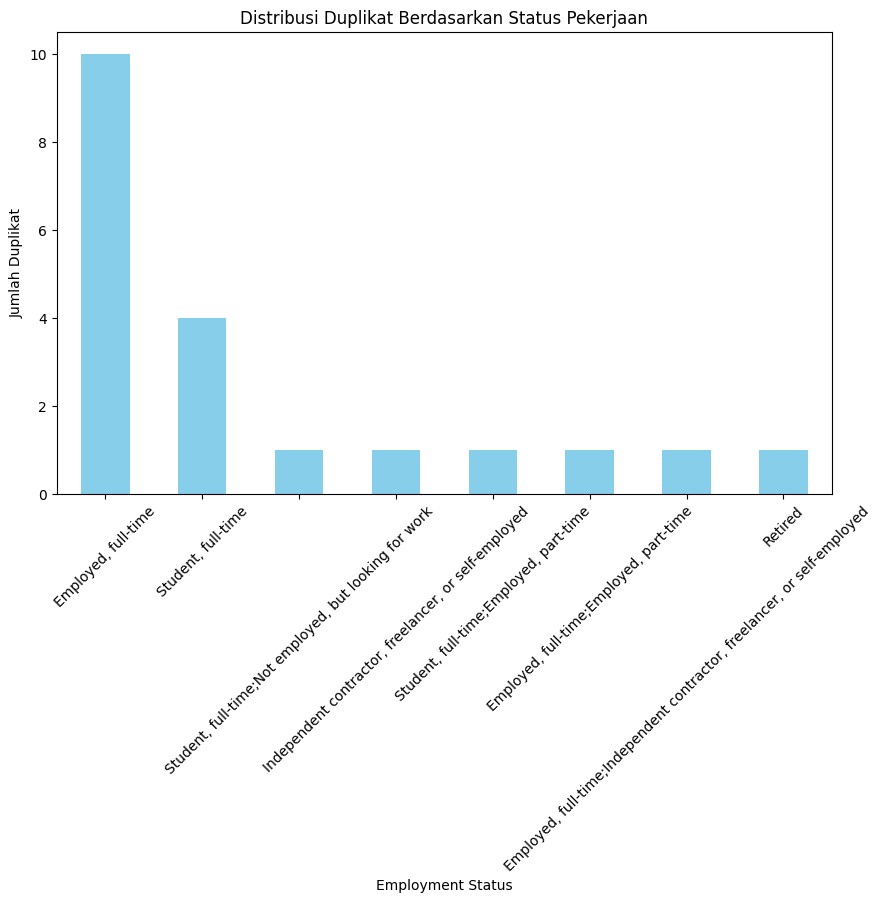

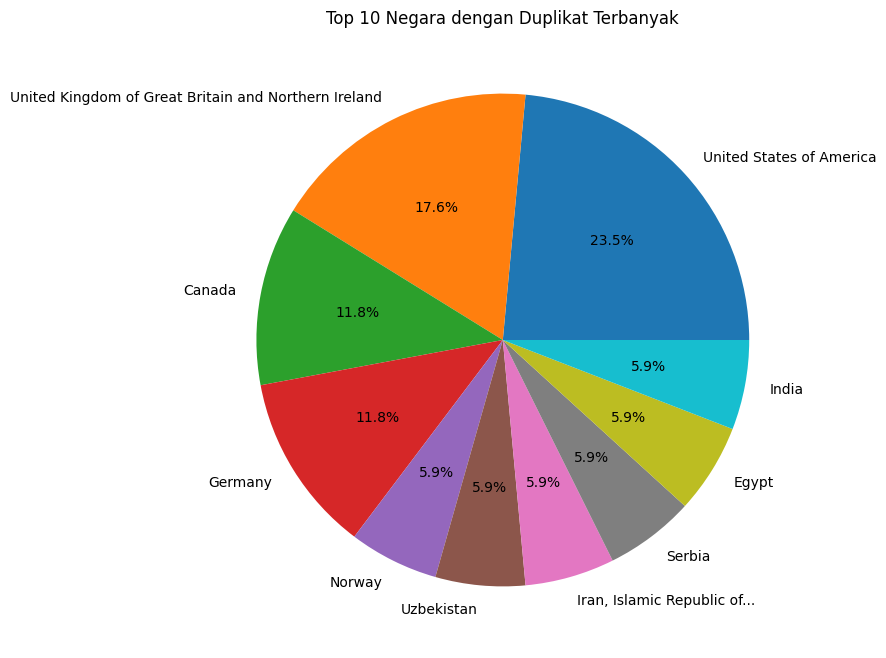

In [5]:
# Visualisasi Distribusi Duplikat (Menjawab Pertanyaan #5)

# Distribusi duplikat berdasarkan Employment (Jawaban Pertanyaan #5)
emp_duplicates = duplicate_rows['Employment'].value_counts()

plt.figure(figsize=(10,6))
emp_duplicates.plot(kind='bar', color='skyblue')
plt.title('Distribusi Duplikat Berdasarkan Status Pekerjaan')
plt.xlabel('Employment Status')
plt.ylabel('Jumlah Duplikat')
plt.xticks(rotation=45)
plt.show()

# Distribusi duplikat berdasarkan Country (Top 10)
country_duplicates = duplicate_rows['Country'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(country_duplicates, labels=country_duplicates.index, autopct='%1.1f%%')
plt.title('Top 10 Negara dengan Duplikat Terbanyak')
plt.show()

In [7]:
# Penghapusan Strategis (Menjawab Pertanyaan #4)
# Menentukan kolom kritis dan menghapus berdasarkan subset (Jawaban Pertanyaan #4)
# Misal: MainBranch, Employment, dan RemoteWork adalah kunci unik kita
df_cleaned = df.drop_duplicates(subset=['MainBranch', 'Employment', 'RemoteWork'])

print(f"Jumlah baris sebelum dibersihkan: {len(df)}")
print(f"Jumlah baris setelah pembersihan strategis: {len(df_cleaned)}")

Jumlah baris sebelum dibersihkan: 65457
Jumlah baris setelah pembersihan strategis: 561
